# Import libs

In [78]:
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

# Get and analyse data

In [2]:
path = 'data/08_05a10_05_parte1 (1).csv'

In [3]:
df = pd.read_csv(path)

In [239]:
df.head(5)

SessionId    StartDateTime(UTC)  \
0  cc143271-3f7e-4ae1-bd60-7209de220cf0-1  5/11/2020 2:58:26 AM   
1  36a43fb1-2525-4e20-bcf4-432436a01691-1  5/11/2020 2:57:10 AM   
2  a8475f01-38ec-4ec6-86ef-b75acca711c3-1  5/11/2020 2:56:56 AM   
3  f36fe1ea-45c1-406a-a242-a752463d9c43-1  5/11/2020 2:51:14 AM   
4  866c5d17-eb78-462e-a1a9-a608d1c88ab1-1  5/11/2020 2:51:42 AM   

                              InitialUserMessage            TopicName  \
0  sou professora e não estou conseguindo baixar             Saudação   
1               Não consigo acessar o aplicativo                  NaN   
2                                            Yes             Saudação   
3                                            Yes  Centro de Mídias SP   
4     Nao consigo entrar no aplicativo da escola                  NaN   

                                      ChatTranscript SessionOutcome  \
0  User says: como baixar no notbook o app do CMS...      Abandoned   
1  User says: Não consigo acessar o aplicativo;Bo...      Unengaged   
2  User says: consigo assistir as aulas depois;Bo...      Abandoned   
3  User says: Como ver as aulas;Bot says: Did you...      Abandoned   
4  User says: Nao consigo entrar no aplicativo da...      Unengaged   

                                      TopicId  
0  new_topic_69ea9dbcaa104743b8e9cb6c8b48c54d  
1                                         NaN  
2  new_topic_69ea9dbcaa104743b8e9cb6c8b48c54d  
3  new_topic_34cd9ed87306433b915ad63fb17ae5e4  
4                                         NaN

In [5]:
df.shape

(1167, 7)

In [13]:
df['TopicName'].value_counts(dropna=False)

Centro de Mídias SP    539
Saudação               339
NaN                    287
Fallback                 1
Escalate                 1
Name: TopicName, dtype: int64

# Test wordcloud

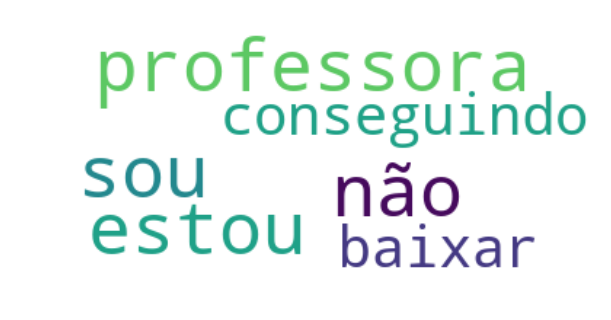

In [217]:
# Start with one review:
text = df.InitialUserMessage[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with column 'InitialUserMessage'

In [240]:
text = df['InitialUserMessage'].replace(['User', 'Says', 'Bot', 'Yes'], ' ').str.cat(sep=', ')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcello/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


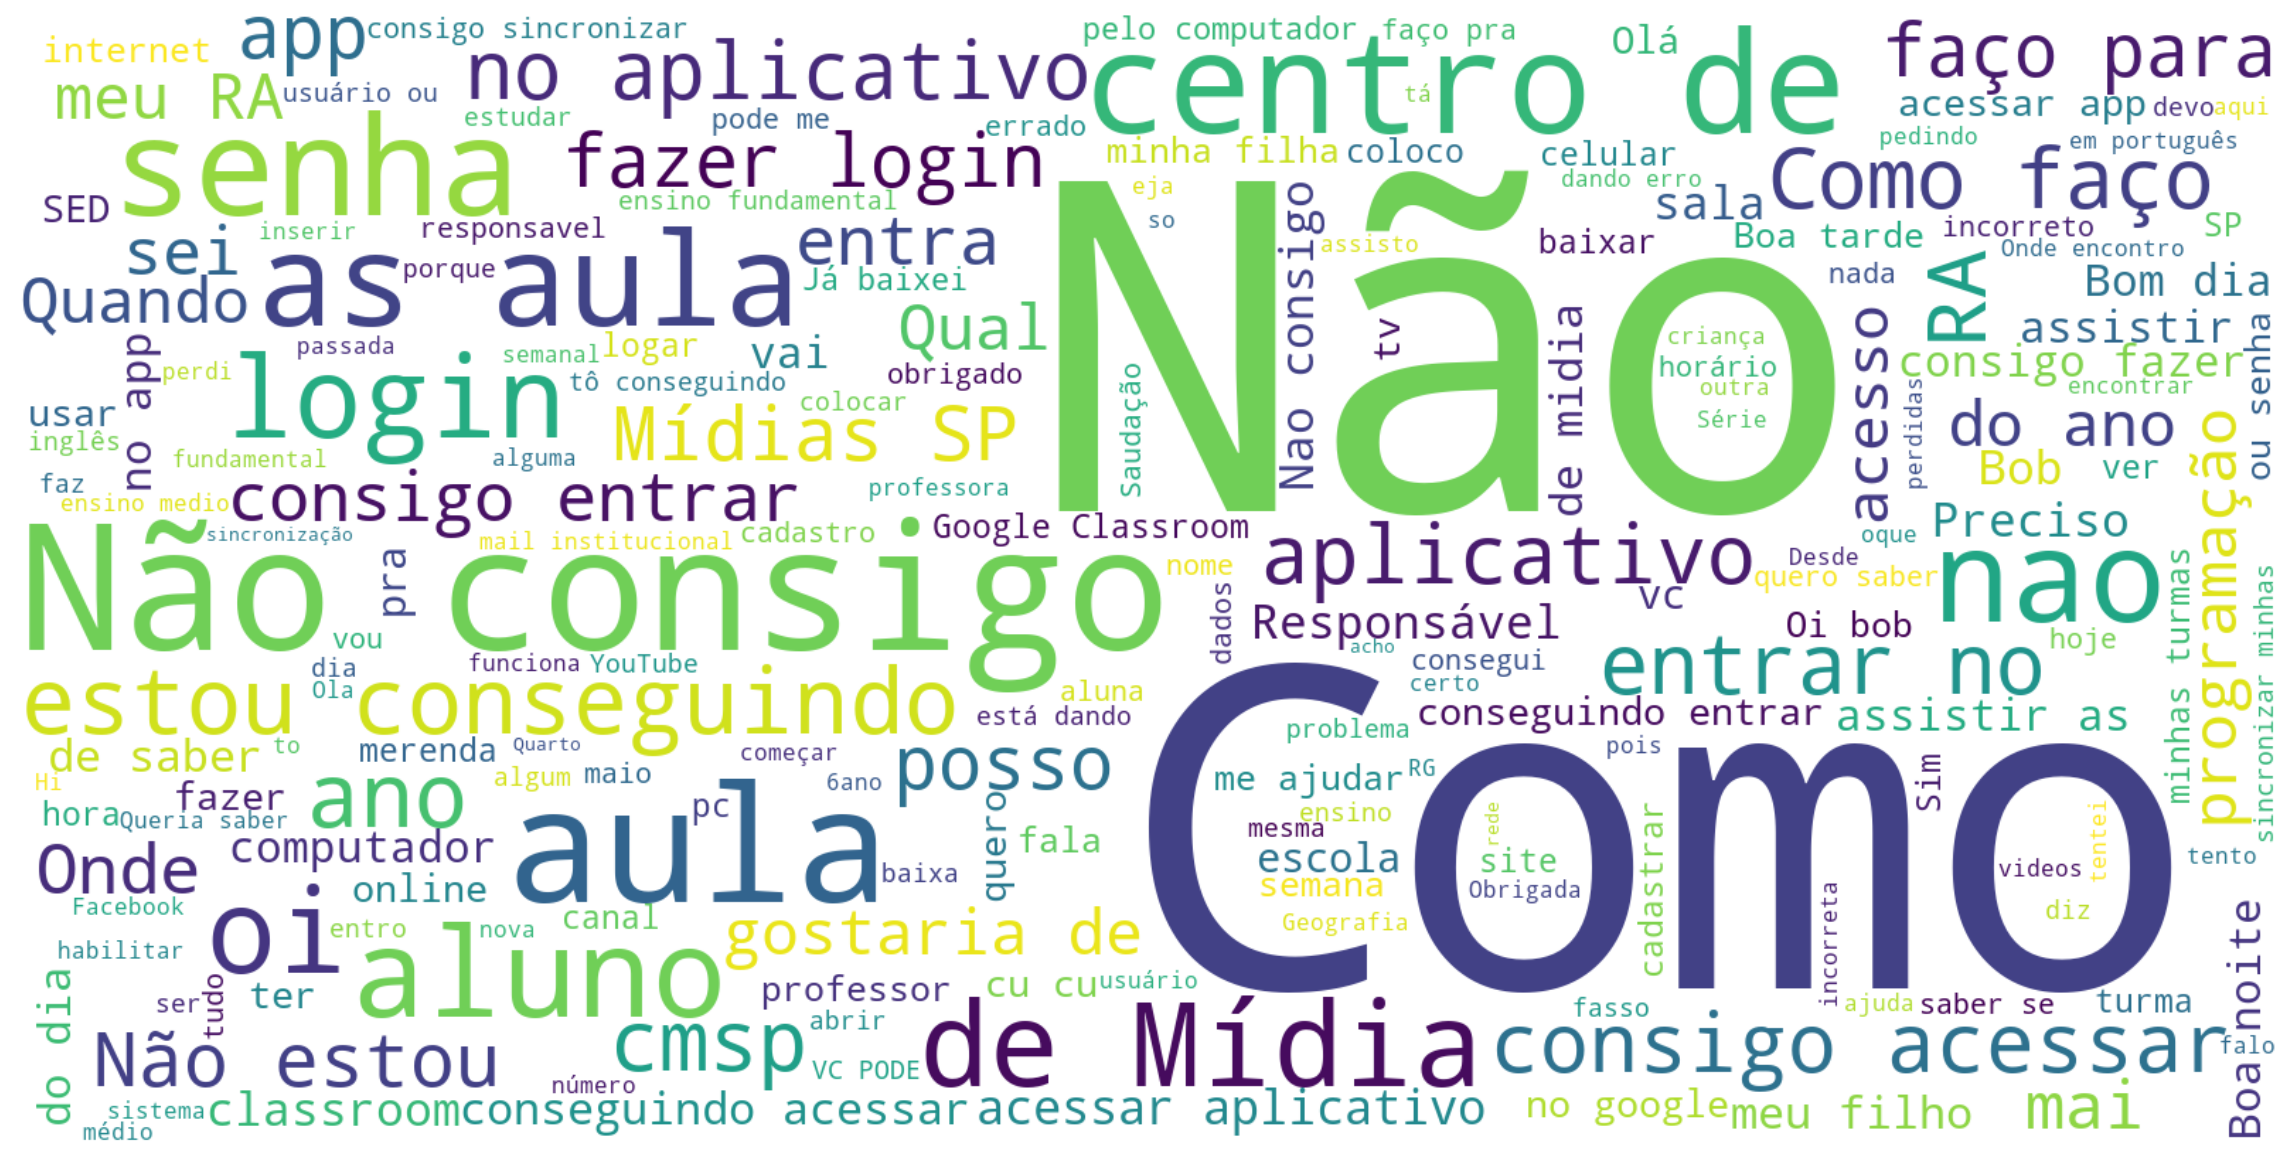

In [241]:
# Stopwords em português:

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords.extend(['user', 'says', 'bot'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Wordcloud with column 'ChatTranscript'

In [229]:
text = df['ChatTranscript'].str.cat(sep=', ')
text = text.replace('User',' ').replace('Says', ' ').replace('Bot', ' ')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcello/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


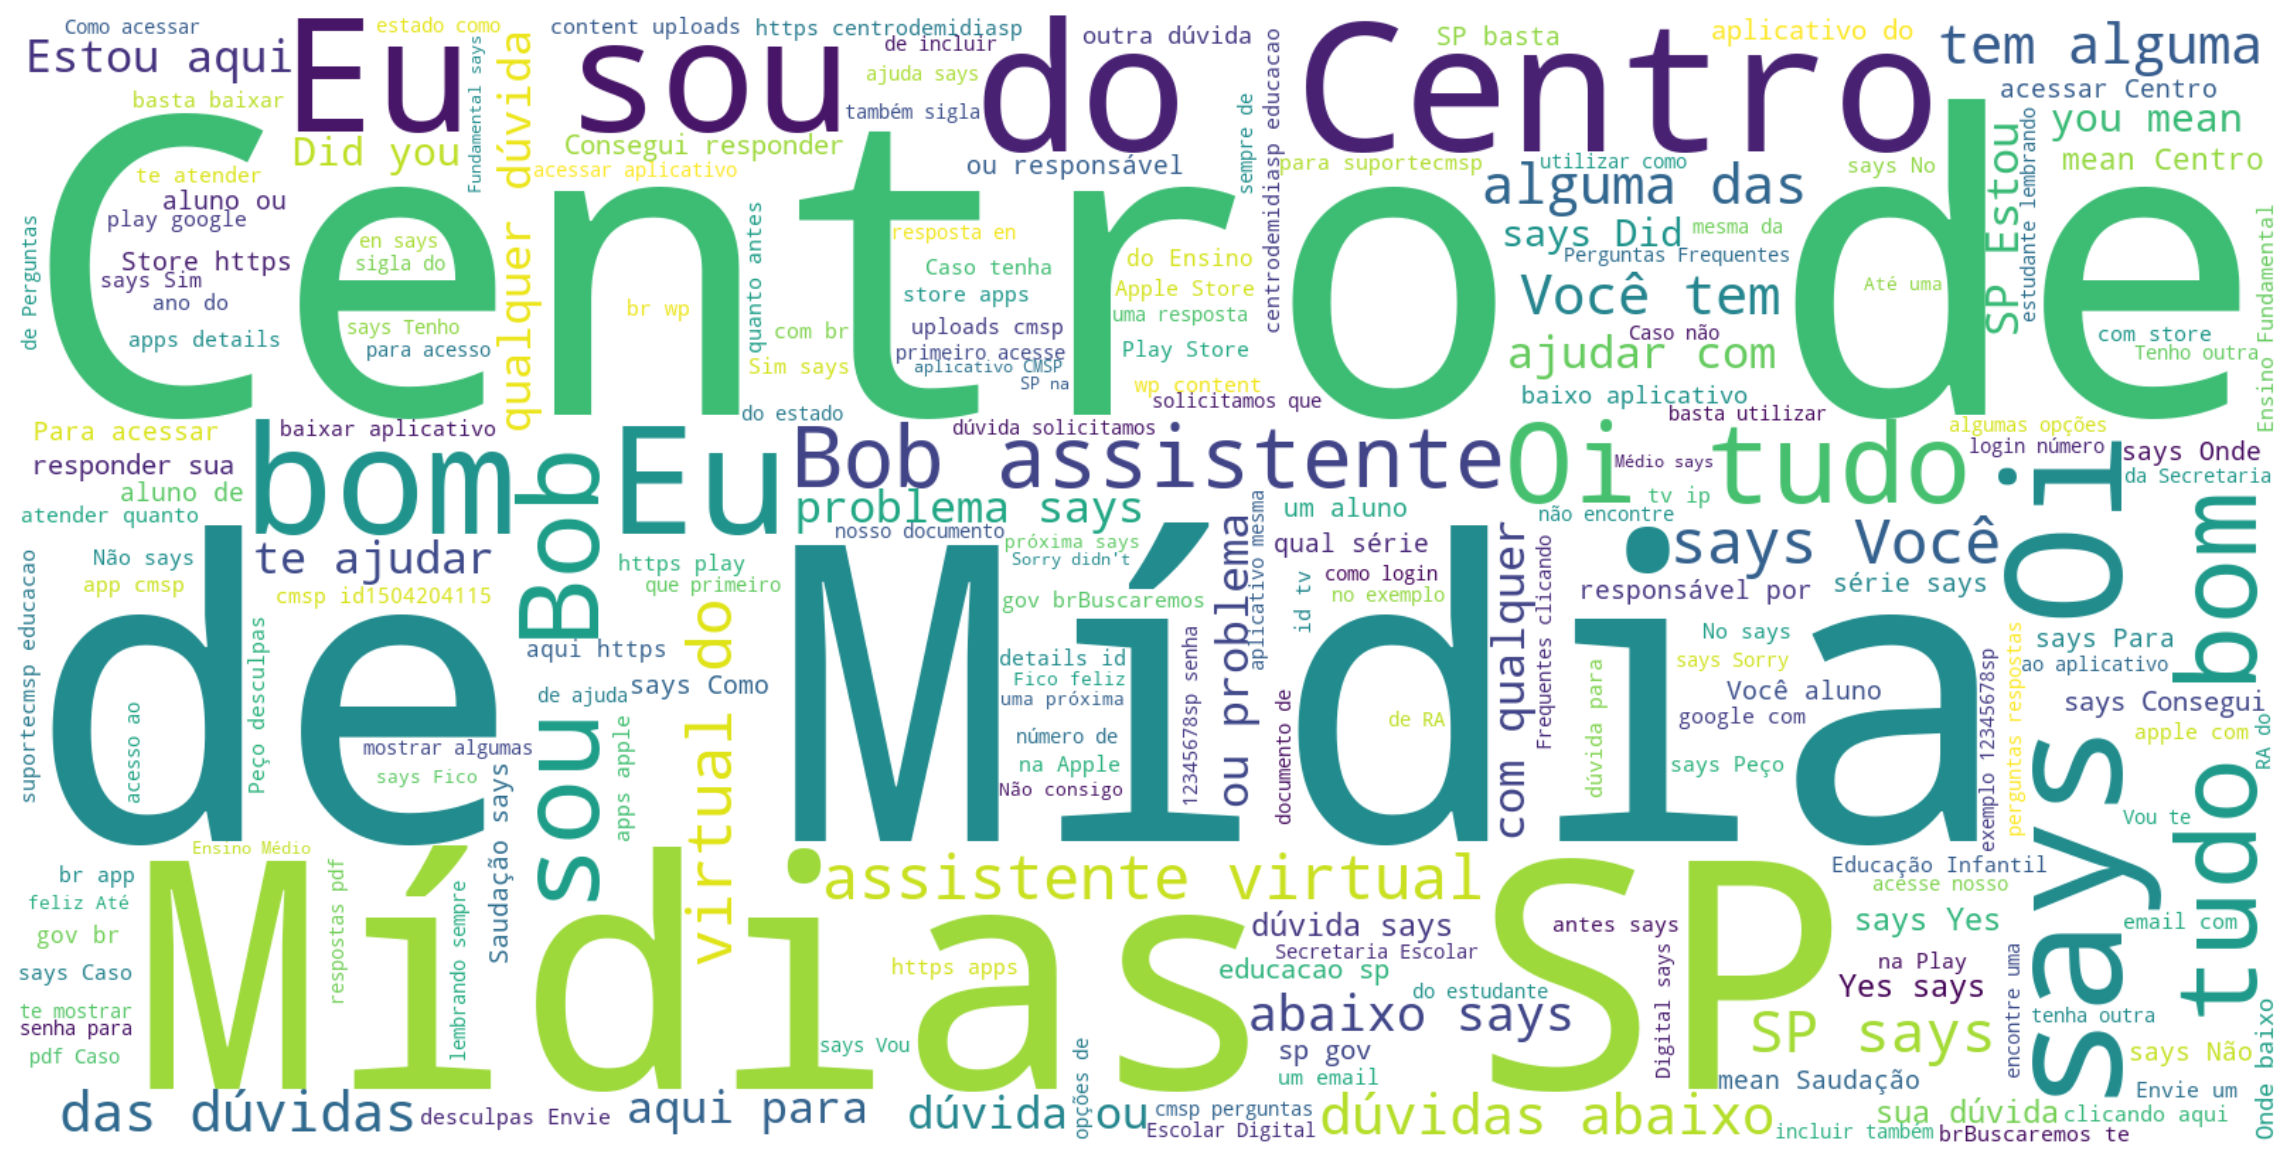

In [230]:
# Stopwords em português:

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Wordcloud with first message of column 'ChatTranscript'

In [231]:
text_2 = df['ChatTranscript'].str.rsplit(";",expand=True)

In [232]:
text_2.head()

0   \
0    User says: como baixar no notbook o app do CMSP   
1        User says: Não consigo acessar o aplicativo   
2        User says: consigo assistir as aulas depois   
3                       User says: Como ver as aulas   
4  User says: Nao consigo entrar no aplicativo da...   

                                            1               2   \
0             Bot says: Did you mean Saudação?  User says: Yes   
1             Bot says: Did you mean Saudação?   User says: No   
2             Bot says: Did you mean Saudação?  User says: Yes   
3  Bot says: Did you mean Centro de Mídias SP?  User says: Yes   
4             Bot says: Did you mean Saudação?                   

                                                  3   \
0  Bot says: Oi tudo bom? Eu sou o Bob o assisten...   
1  Bot says: Vou te mostrar algumas opções de ajuda:   
2  Bot says: Oi tudo bom? Eu sou o Bob o assisten...   
3  Bot says: Oi tudo bom? Eu sou o Bob o assisten...   
4                                               None   

                                                  4   \
0  Bot says: Oi tudo bom? Eu sou o Bob o assisten...   
1  Bot says: Oi tudo bom? Eu sou o Bob o assisten...   
2  Bot says: Oi tudo bom? Eu sou o Bob o assisten...   
3      Bot says: Você tem alguma das dúvidas abaixo?   
4                                               None   

                                                  5   \
0      Bot says: Você tem alguma das dúvidas abaixo?   
1      Bot says: Você tem alguma das dúvidas abaixo?   
2      Bot says: Você tem alguma das dúvidas abaixo?   
3  User says: Como acessar o aplicativo do Centro...   
4                                               None   

                                                  6   \
0  User says: Onde baixo o aplicativo do Centro d...   
1                      User says: Tenho outra dúvida   
2  User says: Em que canal posso assistir à progr...   
3  Bot says: Para acessar o Centro de Mídias SP b...   
4                                               None   

                                                  7   \
0  Bot says: Você é aluno ou responsável por um a...   
1  Bot says: Caso tenha outra dúvida solicitamos ...   
2  Bot says: Para saber o canal da TV Educação em...   
3           Bot says: Consegui responder sua dúvida?   
4                                               None   

                                                  8   \
0  User says: Educação Infantil ou 1º ao 5º ano d...   
1                                                      
2           Bot says: Consegui responder sua dúvida?   
3                                                      
4                                               None   

                                                  9   ...    37    38    39  \
0  Bot says: Para acessar o Centro de Mídias SP b...  ...  None  None  None   
1                                               None  ...  None  None  None   
2                                                     ...  None  None  None   
3                                               None  ...  None  None  None   
4                                               None  ...  None  None  None   

     40    41    42    43    44    45    46  
0  None  None  None  None  None  None  None  
1  None  None  None  None  None  None  None  
2  None  None  None  None  None  None  None  
3  None  None  None  None  None  None  None  
4  None  None  None  None  None  None  None  

[5 rows x 47 columns]

In [233]:
text_2 = text_2[0].str.rsplit(":",expand=True)

In [234]:
text_2 = text_2[1]

In [235]:
text_2.head()

0           como baixar no notbook o app do CMSP
1               Não consigo acessar o aplicativo
2               consigo assistir as aulas depois
3                              Como ver as aulas
4     Nao consigo entrar no aplicativo da escola
Name: 1, dtype: object

In [236]:
text = text_2.str.cat(sep=', ')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcello/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


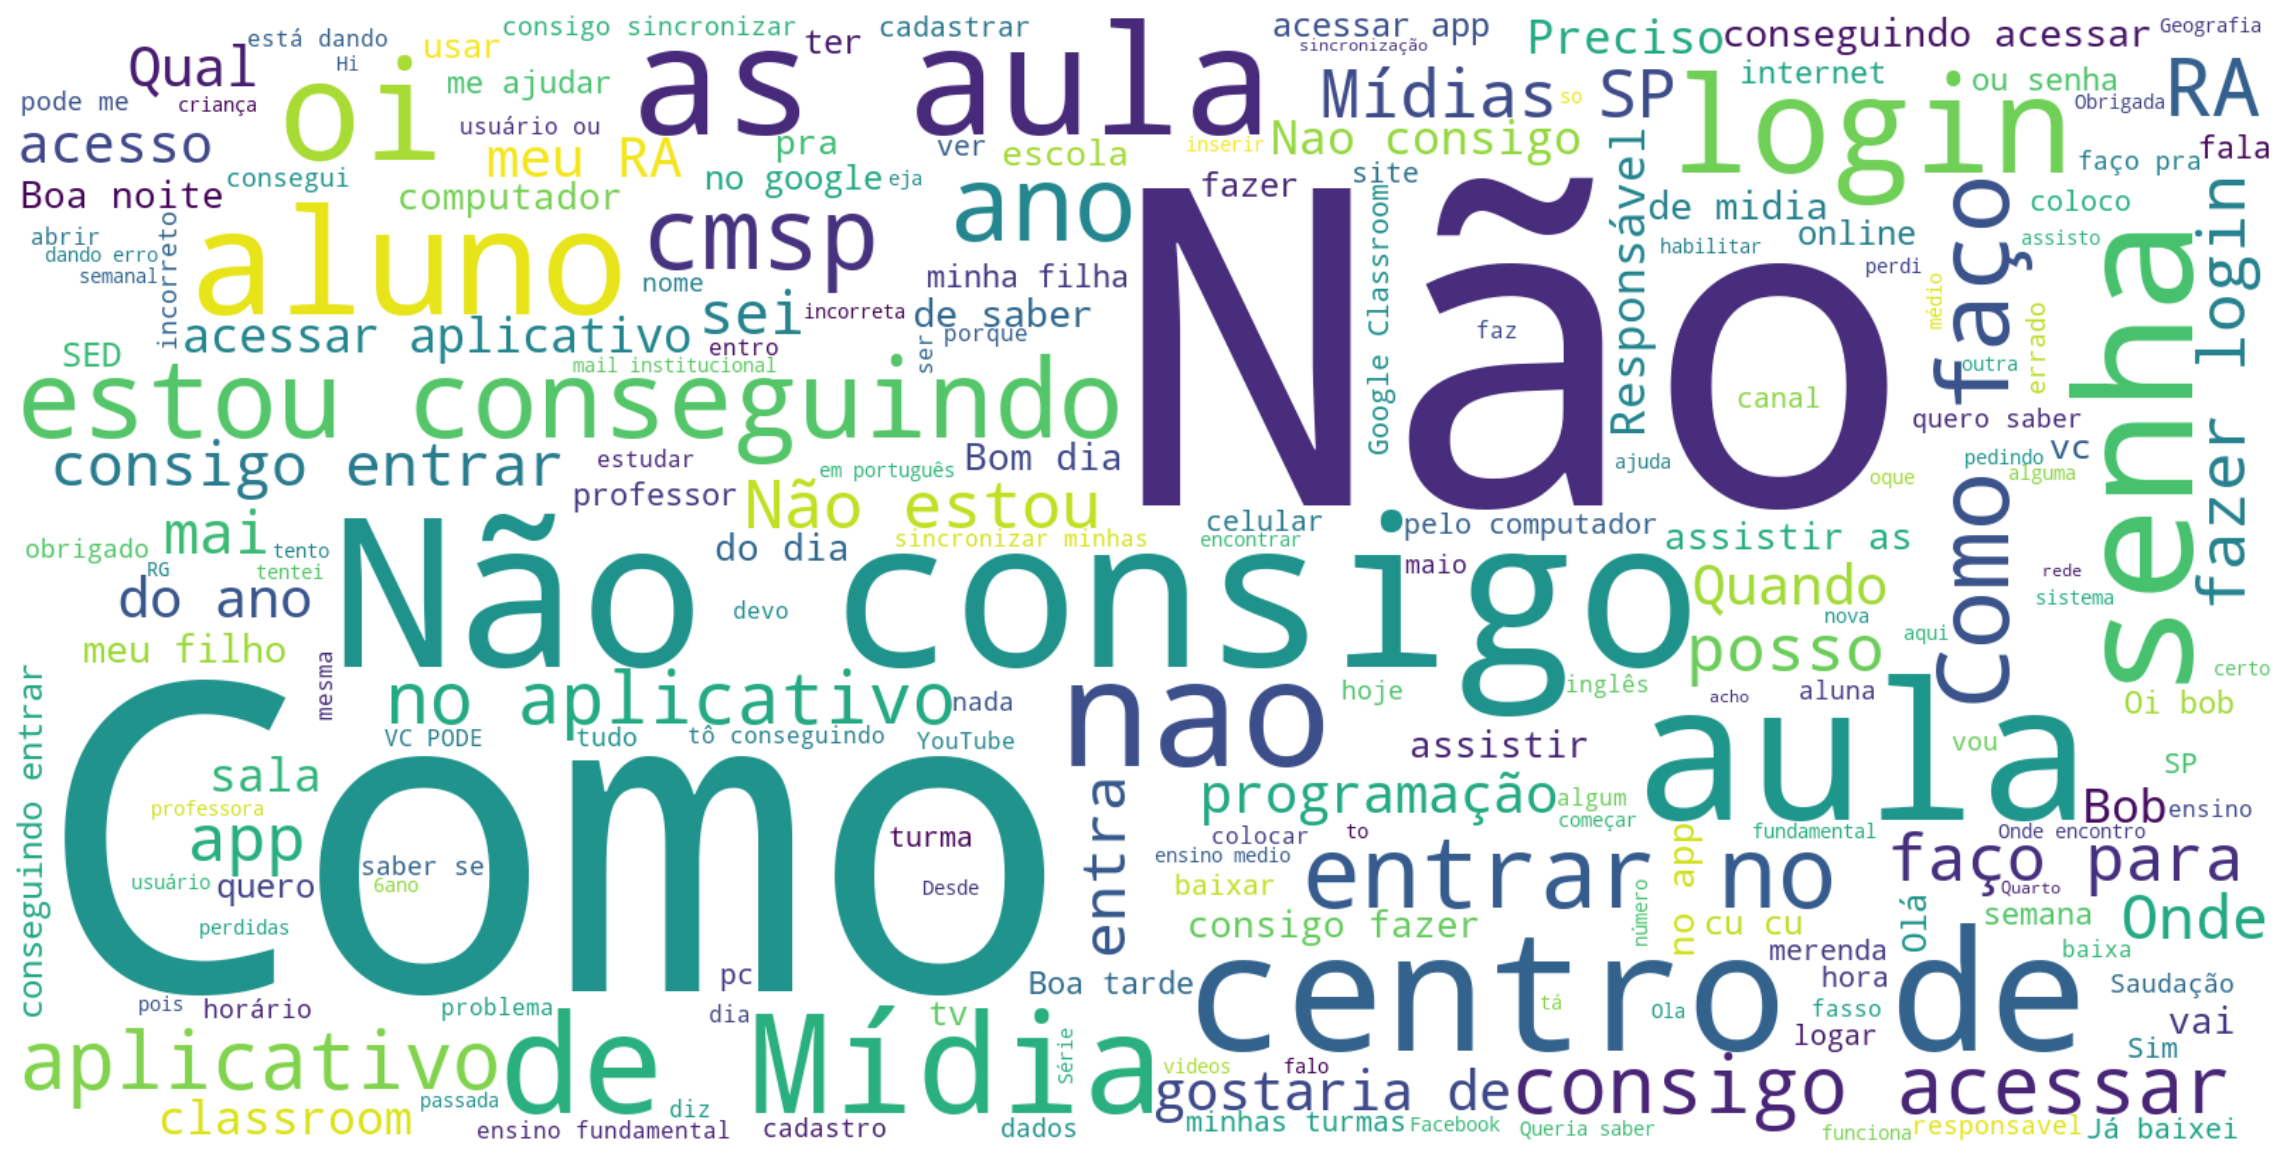

In [243]:
# Stopwords em português:

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()